In [1]:
import os, sys, time

from pathlib import Path
import pickle 
import json 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# import xgboost as xgb
# import shap
# from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from scipy.stats import entropy
from itertools import combinations
from sklearn.metrics import mutual_info_score, confusion_matrix

In [92]:
cell_types = ["L23_IT_CTX_Glut", "L6_IT_CTX_Glut", "DG_Glut", "CA1-ProS_Glut"]

In [33]:
def information_gain(labels, preds): 
    start_entropy = entropy(pd.DataFrame(labels).value_counts(), base=2)
    ccf = confusion_matrix(labels, preds)
    conditional_entropy = (entropy(ccf, base=2, axis=0) * (ccf.sum(axis=0) / ccf.sum())).sum()
    return start_entropy - conditional_entropy 

def jaccard_similarity(set_1, set_2): 
    inter = len(set_1.intersection(set_2))
    union = len(set_1.union(set_2))
    return inter / union

In [29]:
def read_json(_ct, _epoch): 
    with open(f'../train_models/xgb_logging/{_ct}.epoch_{_epoch}.json', 'r') as fp: 
        res_dict = json.load(fp)

    y_test_labels = res_dict['y_test_labels']
    y_test_preds = res_dict['y_test_preds']
    y_train_labels = res_dict['y_train_labels']
    y_train_preds = res_dict['y_train_preds']
    cols_to_keep = set(res_dict['cols_to_keep'])
    
    return (y_test_labels, y_test_preds, y_train_labels, y_train_preds, cols_to_keep)    

In [83]:
def jaccard_corr_matrix(samples): 
    n_samples = len(samples)
    corr = np.zeros((n_samples,n_samples), dtype=np.float64)
    for i in range(n_samples): 
        for j in range(n_samples): 
            corr[i][j] = jaccard_similarity(samples[i], samples[j])
    return corr

array([0., 0., 0.])

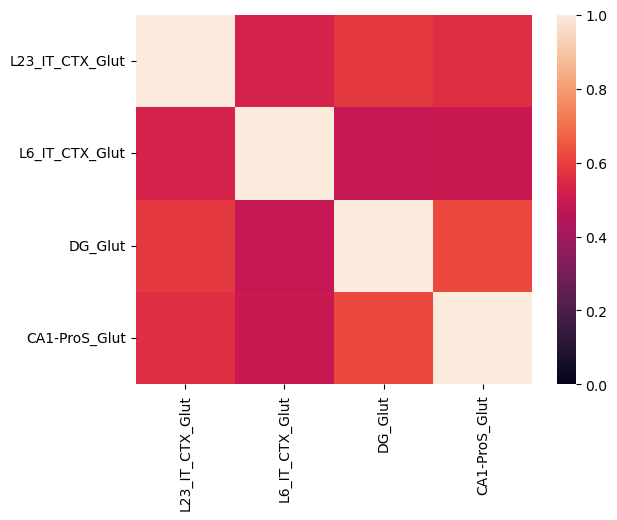

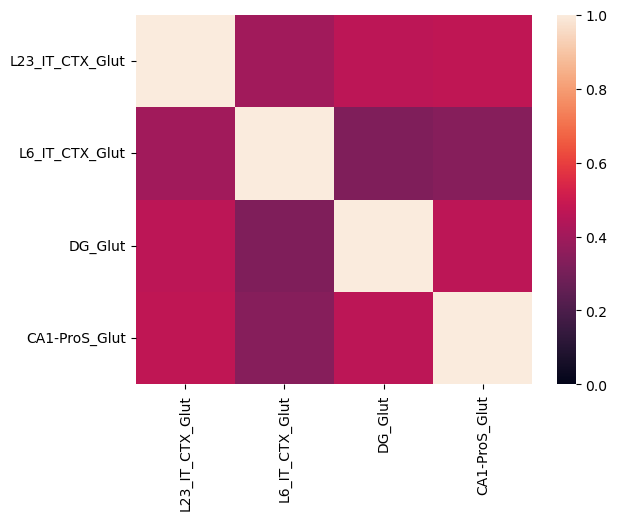

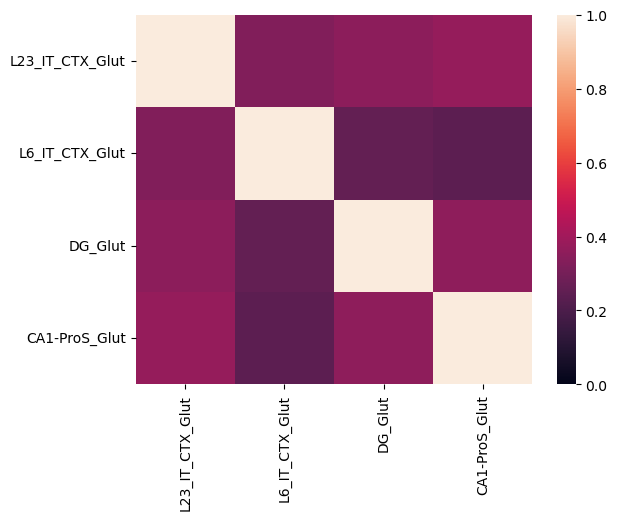

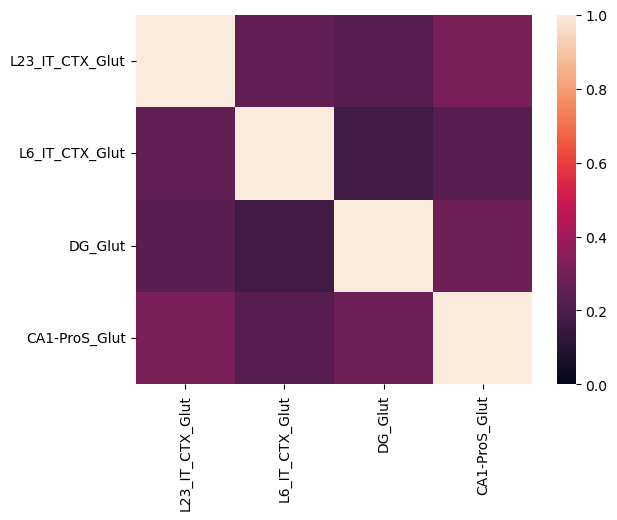

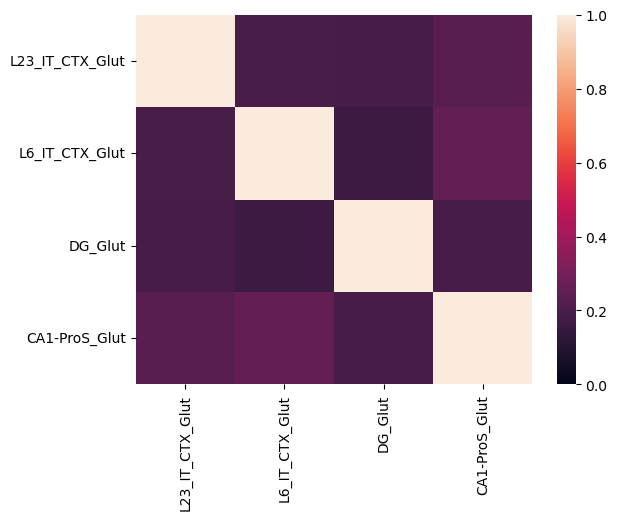

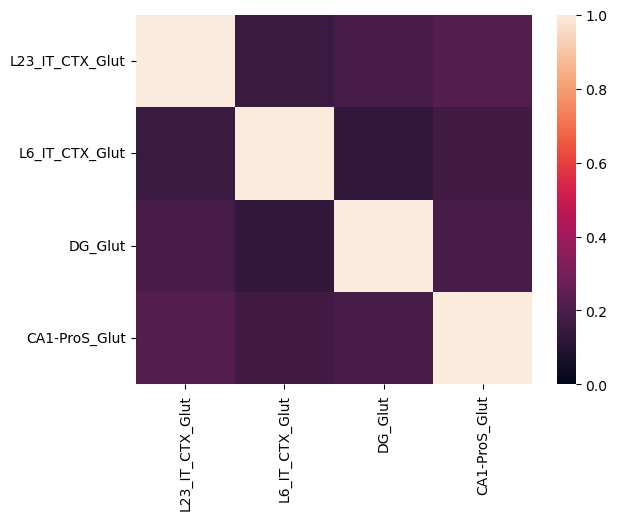

In [93]:
for _e in range(1, 7): 
    ctks = []
    for _ct in cell_types: 
        _, _, _, _, ctk_0 = read_json(_ct,  _e)
        ctks.append(ctk_0)
    # np.corrcoef(ctk_0, ctk_1)
    corr = jaccard_corr_matrix(ctks)
    sns.heatmap(corr, vmin = 0, vmax = 1, xticklabels=cell_types, yticklabels=cell_types)
    plt.show()
    # print(jaccard_similarity(ctk_0, ctk_1))
        

In [58]:
ctk_s = [ctk_0, ctk_1, ctk_0]

In [59]:
for i, x in enumerate(combinations(ctk_s, 2)): 
    print(i)

0
1
2


In [26]:
ccf = confusion_matrix(y_test_labels, y_test_preds)
ccf.sum(axis=0)

array([825, 670, 376])

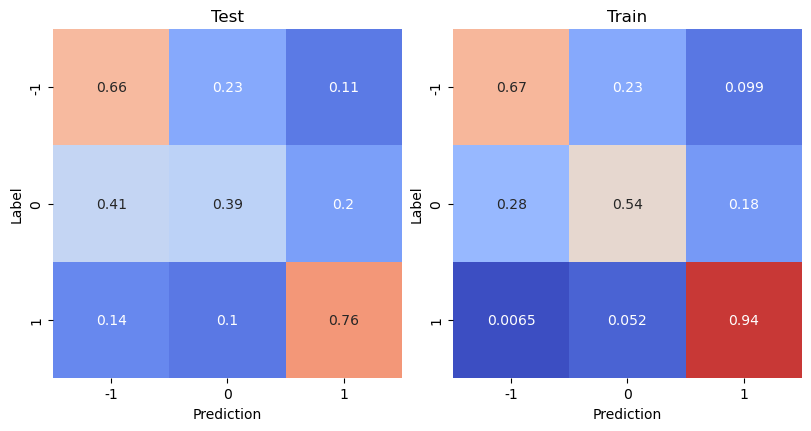

In [27]:
ccf_test = confusion_matrix(y_test_labels, y_test_preds, normalize='true')
ccf_train = confusion_matrix(y_train_labels, y_train_preds, normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(8, 5), constrained_layout=True)
sns.heatmap(ccf_test, vmin=0, vmax=1, xticklabels = ['-1', '0', '1'], yticklabels = ['-1', '0', '1'], 
            square=True, cmap='coolwarm', annot=True, cbar = False, ax=ax[0])
sns.heatmap(ccf_train, vmin=0, vmax=1, xticklabels = ['-1', '0', '1'], yticklabels = ['-1', '0', '1'], 
            square=True, cmap='coolwarm', annot=True, cbar = False, ax=ax[1])

ax[0].set_xlabel("Prediction")
ax[0].set_ylabel("Label")
ax[0].set_title("Test")
ax[1].set_xlabel("Prediction")
ax[1].set_ylabel("Label")
ax[1].set_title("Train")
plt.show()

In [28]:
max_gain = information_gain(y_test_labels, y_test_labels)
gain_ratio = information_gain(y_test_labels, y_test_preds) / max_gain
print("Information Gain Ratio: %.4f bits" % (gain_ratio))

Information Gain Ratio: 0.0647 bits
